Keras: https://keras.io/
MNIST: http://yann.lecun.com/exdb/mnist/ 

In [ ]:
!pip install keras-tqdm

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K
from keras.utils.vis_utils import plot_model
from keras_tqdm import TQDMNotebookCallback
import matplotlib.pyplot as plt
import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(y_train.shape)
print(x_train.shape)

y_train1 = y_train<2
y_train = y_train[y_train1]
x_train = x_train[y_train1]
print(y_train.shape)
print(x_train.shape)


y_test1 = y_test<2
y_test = y_test[y_test1]
x_test = x_test[y_test1]
print(y_test.shape)
print(x_test.shape)


11501568/11490434 [==============================] - 0s 0us/step
(60000,)
(60000, 28, 28)
(12665,)
(12665, 28, 28)
(2115,)
(2115, 28, 28)


In [ ]:
img_rows, img_cols = 28, 28
batch_size = 128
num_classes = 2
epochs = 10

x_train = np.reshape(x_train, [x_train.shape[0], img_rows*img_cols])
x_test = np.reshape(x_test, [x_test.shape[0], img_rows*img_cols])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
input_shape = (img_rows*img_cols)

x_train shape: (12665, 784)
12665 train samples
2115 test samples


In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)

(12665, 2)


In [ ]:
model = Sequential()
model.add(Dense(1, activation='linear', input_shape = [784]))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 785       
                                                                 
 dense_1 (Dense)             (None, 2)                 4         
                                                                 
Total params: 789
Trainable params: 789
Non-trainable params: 0
_________________________________________________________________
None


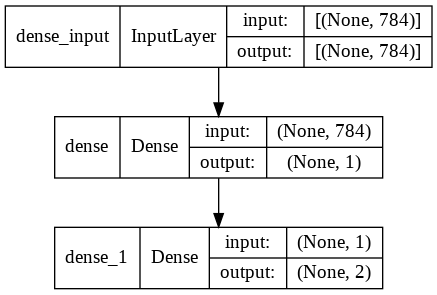

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(x_test, y_test))

In [ ]:
history.history['accuracy']

[0.9853138327598572,
 0.9954994320869446,
 0.9965258836746216,
 0.9974733591079712,
 0.997789204120636,
 0.9978681206703186,
 0.998104989528656,
 0.9982629418373108,
 0.9984998106956482,
 0.9986577033996582]

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy on test set: ",score[1])

Accuracy on test set:  0.9995272159576416


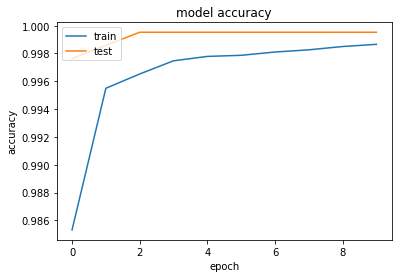

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

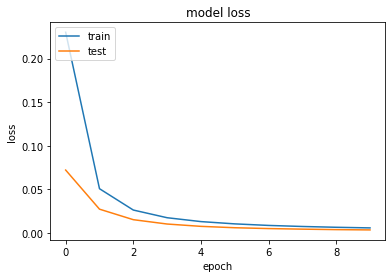

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()